---
### Arquitectura de la Red
---

### Implementación en numpy

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

datos= pd.read_csv('manzanas_procesado.csv')

entradas= datos.iloc[:, 1:8]
salida= datos.iloc [:, -1].values

P_oculto= np.random.rand(7,7)
P_salida= np.random.rand(1,7)

B_oculto= np.random.rand(7,1)
B_salida= np.random.rand(1,1)

x_train, x_test, y_train, y_test= train_test_split(entradas, salida, test_size=1/3)
n = x_train.shape[0]

L=0.01

def relu(x):
    return np.maximum(x,0)
def logistic(x): 
    return 1/(1+np.exp(-x))

def d_relu(x):
    return x>0

def d_logistic(x):
    return np.exp(-x)/(1+np.exp(-x))**2


def forward(x):
    Z1=P_oculto@x+B_oculto
    A1=relu(Z1)
    Z2=P_salida@A1+B_salida
    A2=logistic(Z2)
    return Z1,A1,Z2,A2

def funcion_costo(x,y):
    return (x-y)**2


def backward(Z1,A1,Z2,A2,X,Y):
    dC_dA2= 2*A2 -2*Y
    dA2_dZ2= d_logistic(Z2)
    dZ2_dA1= P_salida
    dZ2_dW2= A1
    dZ2_dB2= 1
    dA1_dZ1= d_relu(Z1)
    dZ1_dW1= X
    dZ1_dB1= 1

    dC_dW2= dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2= dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1= dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1= dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1= dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2


for i in range(100_000):
    indice= np.random.choice(n, 1, replace=False)
    muestra_X= x_train.iloc[indice].values.transpose()
    muestra_Y= y_train[indice]

    Z1, A1, Z2, A2= forward(muestra_X)

    dW1, dB1, dW2, dB2= backward(Z1, A1, Z2, A2, muestra_X, muestra_Y)

    P_oculto-= L*dW1
    B_oculto-= L*dB1
    P_salida-= L*dW2
    B_salida-= L*dB2

predicciones_test= forward(x_test.values.T)[3]

y_test_np= np.array(y_test)

clases_predichas= (predicciones_test >= 0.5).astype(int).flatten()
clases_reales= y_test_np.flatten()

comparacion_test= clases_predichas==clases_reales
accuracy= np.mean(comparacion_test)
print(f"Accuracy={accuracy}")
    


Accuracy=0.7341772151898734


---
### Entrenamiento y Evaluación


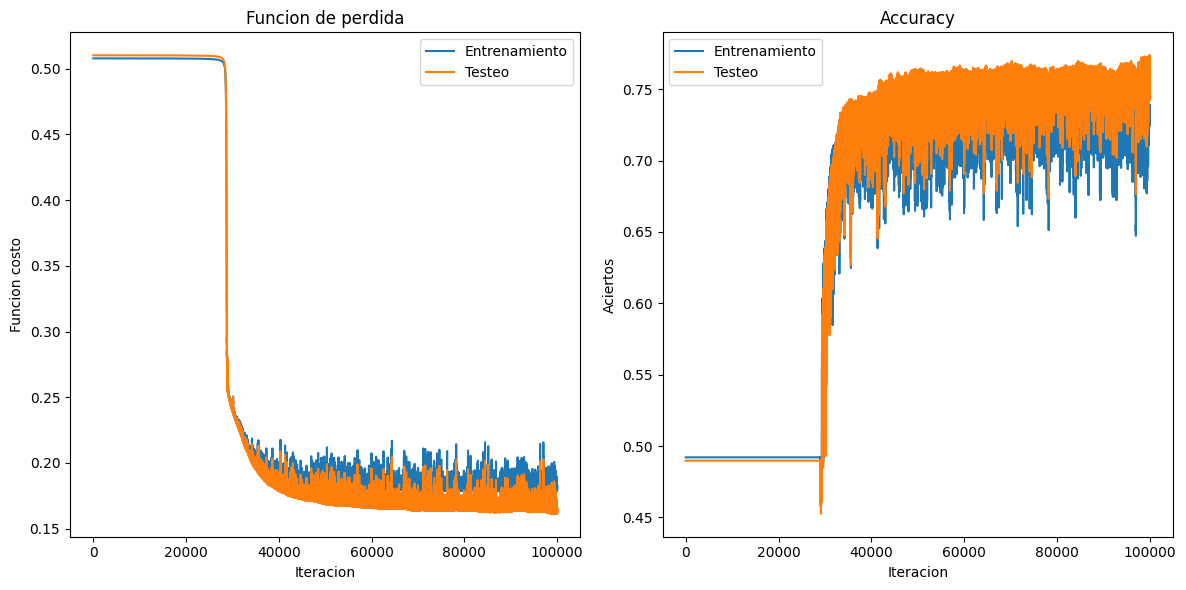

In [27]:
import matplotlib.pyplot as plt

P_oculto= np.random.rand(7,7)
P_salida= np.random.rand(1,7)

B_oculto= np.random.rand(7,1)
B_salida= np.random.rand(1,1)

error_trainlist = []
error_testlist = []
accuracy_trainlist = []
accuracy_testlist = []

for i in range(100_000):
    indice=np.random.choice(n,1,replace=False)
    muestra_X= x_train.iloc[indice].values.transpose()
    muestra_Y= y_train[indice]

    Z1, A1, Z2, A2= forward(muestra_X)

    dW1, dB1, dW2, dB2= backward(Z1, A1, Z2, A2, muestra_X, muestra_Y)

    P_oculto-= L*dW1
    B_oculto-= L*dB1
    P_salida-= L*dW2
    B_salida-= L*dB2

    prediccion_train= forward(x_train.values.T)[3]
    error_train= np.mean(funcion_costo(prediccion_train, y_train.reshape(1,-1)))
    accuracy_train= np.mean((prediccion_train >= 0.5). astype(int).flatten()==y_train)

    prediccion_test= forward(x_test.values.T)[3]
    error_test= np.mean(funcion_costo(prediccion_test, y_test.reshape(1, -1)))
    accuracy_test= np.mean((prediccion_test >= 0.5).astype(int).flatten() == y_test)

    error_trainlist.append(error_train)
    error_testlist.append(error_test)
    accuracy_trainlist.append(accuracy_train)
    accuracy_testlist.append(accuracy_test) 

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(error_trainlist, label="Entrenamiento")
plt.plot(error_testlist, label="Testeo")
plt.title("Funcion de perdida")
plt.xlabel("Iteracion")
plt.ylabel("Funcion costo")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracy_trainlist, label="Entrenamiento")
plt.plot(accuracy_testlist, label="Testeo")
plt.title("Accuracy")
plt.xlabel("Iteracion")
plt.ylabel("Aciertos")
plt.legend()

plt.tight_layout()
plt.show()




---
### Análisis de Overfitting
---